# 📊 Анализ данных о росте, весе и BMI

В этом проекте мы проведём EDA-исследование датасета с физическими параметрами: рост, вес, BMI.  
Наша цель — изучить распределения признаков, вычислить индекс массы тела, построить визуализации и сделать аналитические выводы.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.replace('"', '').str.replace(' ', '')

In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           200 non-null    int64  
 1   Height(Inches)  200 non-null    float64
 2   Weight(Pounds)  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


,0
Index,0
Height(Inches),0
Weight(Pounds),0


In [4]:
df["BMI"] = (df["Weight(Pounds)"] / df["Height(Inches)"]**2) * 703

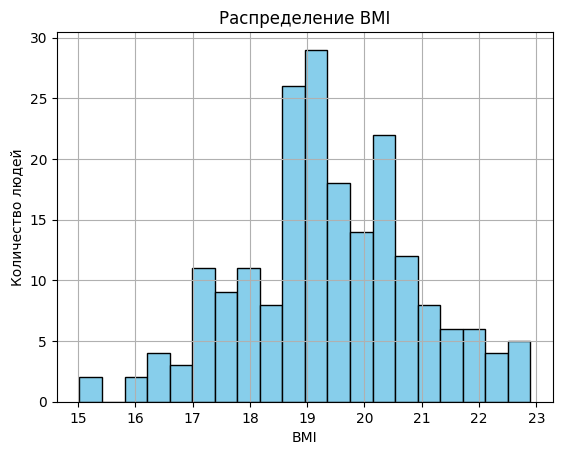

In [5]:
plt.hist(df["BMI"], bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение BMI")
plt.xlabel("BMI")
plt.ylabel("Количество людей")
plt.grid(True)
plt.show()

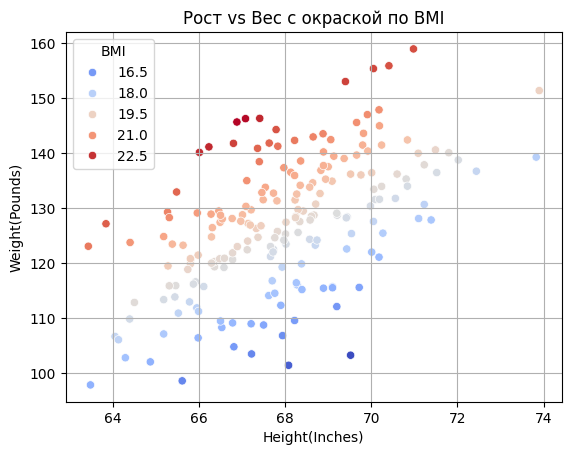

In [6]:
sns.scatterplot(x="Height(Inches)", y="Weight(Pounds)", data=df, hue="BMI", palette="coolwarm")
plt.title("Рост vs Вес с окраской по BMI")
plt.grid(True)
plt.show()

In [12]:
heavy = df["Weight(Pounds)"]
print(f'Средний вес: {heavy.mean()}')
tall=df["Height(Inches)"]
print(f'Средний рост: {tall.mean()}')

df["BMI"]= (heavy/tall**2)*703
print(df['BMI'].mean())

print(df[df['BMI']>22].shape[0])
print((df[df['BMI']>22].shape[0]/df.shape[0])*100)

Средний вес: 127.22194999999999
Средний рост: 67.9498
19.359801890949463
11
5.5


## 🔍 Выводы по анализу данных

На основе проведённого анализа можно сделать следующие выводы:

- **Средний рост** в выборке составляет примерно `127.2` дюймов.
- **Средний вес** — около `68` фунтов.
- **Средний BMI** составляет `19,3` (рассчитан по формуле).


- Около `11` человек имеют **избыточный вес (BMI > 22)**, что составляет примерно `5.5%` выборки.
- Распределение BMI смещено вправо — то есть большинство людей имеют нормальный вес, но есть "хвост" с более высокими значениями.
- Есть **заметная положительная зависимость** между ростом и весом — чем выше человек, тем он обычно тяжелее.

- Визуализации (гистограмма, boxplot, scatter) помогают наглядно увидеть распределения и взаимосвязи между переменными.
